In [1]:
import pandas as pd
import scanpy as sc
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes sadly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)
#Set style
sns.set(style="whitegrid", palette="pastel", color_codes=True)

from matplotlib.colors import ListedColormap

from scipy.stats import mannwhitneyu

np.random.seed(31)

coloring percentiles based on code from
https://stackoverflow.com/questions/62753173/how-to-color-swarmplot-dots-depending-on-quartile

In [2]:
cmap = ListedColormap(['0.25', 'red'])

In [3]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300, bbox_inches = 'tight', transparent = True)

In [4]:
figSavePath = ""

In [5]:
msBase = "/Users/kayaneh/Documents/deconvolution/molecstetho/remapped_unstranded/"
molecStethoCtsPath = msBase + "htseq_merged_unstrandedTS3_molestetho.csv"

intronPath = msBase + "intron_exon_ratios_unstrandedTS3_molestetho.txt"
riboPath = msBase + "molecStetho_ribo_frac_unstrandedTS3.txt"
prime3Path = msBase + "deg_3prime_bias_frac_1_unstrandedTS3_molestetho.txt"

In [6]:
intronDistrib = pd.read_csv(intronPath, sep = "\t", index_col = 0)
riboDistrib = pd.read_csv(riboPath, sep = ",", index_col = 0)
prime3Distrib = pd.read_csv(prime3Path, sep = "\t",index_col = 0)

In [7]:
allQCDat = intronDistrib.join(riboDistrib)
allQCDat = allQCDat.join(prime3Distrib)

In [8]:
intronDistrib.shape

(285, 1)

In [9]:
riboDistrib.shape

(285, 1)

In [10]:
# from moufarrej et al
ribo = 0.2 
deg = 0.4
intron = 3

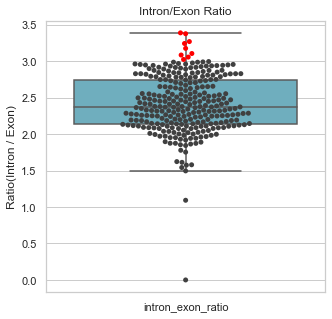

In [11]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = intronDistrib, color = "#62B6CB", fliersize = 0)
ax = sns.swarmplot(data = intronDistrib, color = "0.25")
for col in ax.collections:
    y = col.get_offsets()[:,1]

    col.set_cmap(cmap)
    col.set_array(np.digitize(y, [intron]))
plt.title("Intron/Exon Ratio")
plt.ylabel("Ratio(Intron / Exon)")
save_figure_pdf(plt, figSavePath + "molecStetho_intronExonQC_09102021.pdf")

In [12]:
riboDistrib.sort_values(by = "ribo_frac", ascending = False)

,ribo_frac
sample,
SRR8492779,0.501737
SRR8492617,0.477192
SRR8492565,0.458660
SRR8492780,0.447684
SRR8492802,0.431596
...,...
SRR8492571,0.017182
SRR8492578,0.016183
SRR8492570,0.015505


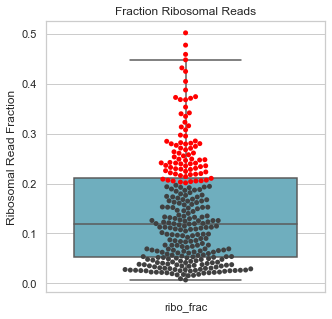

In [13]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = riboDistrib, color = "#62B6CB", fliersize = 0)
ax = sns.swarmplot(data = riboDistrib, color = "0.25")
for col in ax.collections:
    y = col.get_offsets()[:,1]

    col.set_cmap(cmap)
    col.set_array(np.digitize(y, [ribo]))
plt.title("Fraction Ribosomal Reads")
plt.ylabel("Ribosomal Read Fraction")
save_figure_pdf(plt, figSavePath + "molecStetho_riboFracQC_09102021.pdf")

In [14]:
intronDistrib.sort_values(by = "intron_exon_ratio")

,intron_exon_ratio
sample,
SRR8492784,0.0000
SRR8492588,1.0926
SRR8492576,1.4955
SRR8492575,1.5417
SRR8492675,1.5743
...,...
SRR8492571,3.1755
SRR8492823,3.2425
SRR8492695,3.2688


In [15]:
prime3Distrib.sort_values(by = "bias_frac")

,bias_frac
sample,
SRR8492580,0.157562
SRR8492582,0.159778
SRR8492583,0.159794
SRR8492589,0.161051
SRR8492789,0.162855
...,...
SRR8492669,0.318663
SRR8492716,0.320409
SRR8492753,0.321608


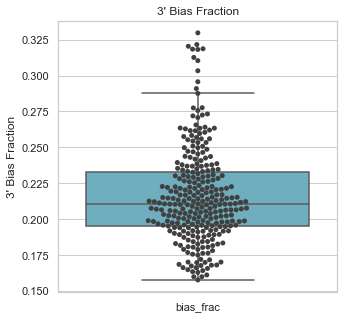

In [16]:
plt.figure(figsize = (5, 5))
sns.boxplot(data = prime3Distrib, color =  "#62B6CB", fliersize = 0)
ax = sns.swarmplot(data = prime3Distrib, color = "0.25")
for col in ax.collections:
    y = col.get_offsets()[:,1]
    col.set_cmap(cmap)
    col.set_array(np.digitize(y, [deg]))
plt.title("3' Bias Fraction")
plt.ylabel("3' Bias Fraction")
save_figure_pdf(plt, figSavePath + "molecStetho_3PrimeBiasQC_09102021.pdf")

In [17]:
clear all